In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

In [97]:
df= pd.read_csv("diabetes_binary_health_indicators_BRFSS2015.csv")
df.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [99]:
# Check for nulls and data types
missing_values = df.isnull().sum()
missing_values

Diabetes_binary         0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

In [101]:
feature_names = df.drop("Diabetes_binary", axis=1).columns.tolist()
print(feature_names)

['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income']


In [103]:
#Check duplicate rows
duplicate_c = df.duplicated().sum()
duplicate_c

24206

In [105]:
X = df.drop("Diabetes_binary", axis=1)
y = df["Diabetes_binary"]

In [107]:
#duplicates value remove
df = df.drop_duplicates()
X = df.drop("Diabetes_binary", axis=1)
y = df["Diabetes_binary"]

In [109]:
#Check duplicate rows again
duplicate_c = df.duplicated().sum()
duplicate_c

0

In [111]:
y.value_counts(normalize=True)

Diabetes_binary
0.0    0.847055
1.0    0.152945
Name: proportion, dtype: float64

In [113]:
#Correlation with Target
c_matrix = df.corr(numeric_only=True)
t_cor = c_matrix["Diabetes_binary"].drop("Diabetes_binary").sort_values(ascending=False)
print("Correlation with Diabetes_binary:\n")
print(t_cor)

Correlation with Diabetes_binary:

GenHlth                 0.276940
HighBP                  0.254318
DiffWalk                0.205302
BMI                     0.205086
HighChol                0.194944
Age                     0.177263
HeartDiseaseorAttack    0.168213
PhysHlth                0.156211
Stroke                  0.099193
CholCheck               0.072523
MentHlth                0.054153
Smoker                  0.045504
Sex                     0.032724
AnyHealthcare           0.025331
NoDocbcCost             0.020048
Fruits                 -0.024805
Veggies                -0.041734
HvyAlcoholConsump      -0.065950
PhysActivity           -0.100404
Education              -0.102686
Income                 -0.140659
Name: Diabetes_binary, dtype: float64


In [115]:
#corr_abs t_cor = c_matrix["Diabetes_binary"].drop("Diabetes_binary").abs().sort_values(ascending=False)
corr_abs =t_cor.abs().sort_values(ascending=False)
#top correlated features
print(corr_abs)

GenHlth                 0.276940
HighBP                  0.254318
DiffWalk                0.205302
BMI                     0.205086
HighChol                0.194944
Age                     0.177263
HeartDiseaseorAttack    0.168213
PhysHlth                0.156211
Income                  0.140659
Education               0.102686
PhysActivity            0.100404
Stroke                  0.099193
CholCheck               0.072523
HvyAlcoholConsump       0.065950
MentHlth                0.054153
Smoker                  0.045504
Veggies                 0.041734
Sex                     0.032724
AnyHealthcare           0.025331
Fruits                  0.024805
NoDocbcCost             0.020048
Name: Diabetes_binary, dtype: float64


In [117]:
#Multicollinearity Check(VIF)
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

X_const = add_constant(X)
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X_const.values, i+1) for i in range(len(X.columns))]
print(vif_data.sort_values("VIF", ascending=False))

                 Feature       VIF
13               GenHlth  1.716096
15              PhysHlth  1.594297
16              DiffWalk  1.511628
20                Income  1.430313
18                   Age  1.353317
0                 HighBP  1.301200
19             Education  1.272080
14              MentHlth  1.221587
6   HeartDiseaseorAttack  1.167062
1               HighChol  1.158112
12           NoDocbcCost  1.135647
7           PhysActivity  1.130509
3                    BMI  1.121050
11         AnyHealthcare  1.109839
9                Veggies  1.098133
8                 Fruits  1.097947
5                 Stroke  1.077470
4                 Smoker  1.076032
17                   Sex  1.075743
2              CholCheck  1.035274
10     HvyAlcoholConsump  1.026354


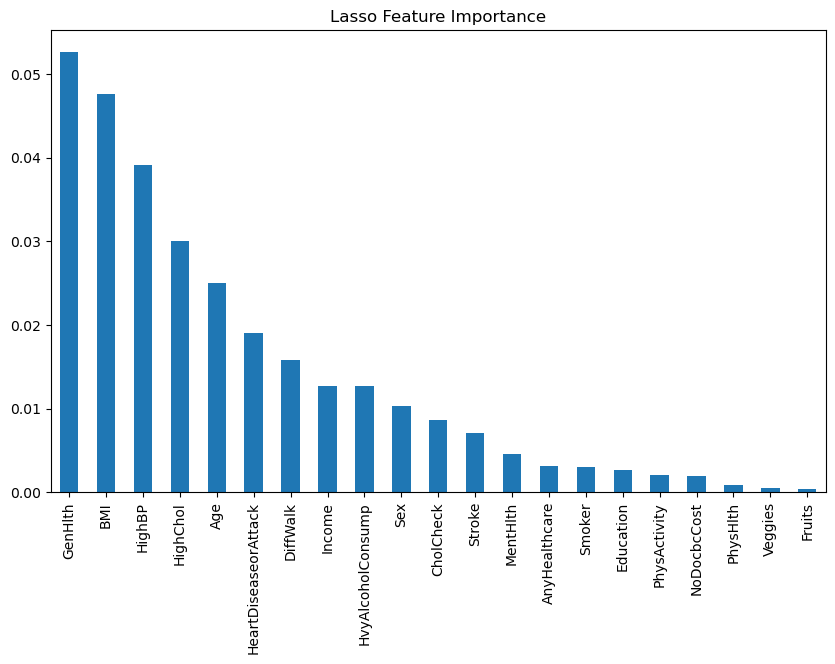

In [118]:
#Feature Importance Using Lasso Regression(Selection)

from sklearn.linear_model import LassoCV
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

lasso = LassoCV(cv=5, random_state=0)
lasso.fit(X_scaled, y)

feature_importance = pd.Series(np.abs(lasso.coef_), index=X.columns)
feature_importance = feature_importance[feature_importance > 0]
feature_importance.sort_values(ascending=False).plot(kind='bar', figsize=(10,6), title="Lasso Feature Importance")
plt.show()

In [119]:
#Recursive Feature Elimination (RFE) with Logistic
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
rfe = RFE(model, n_features_to_select=10)
rfe.fit(X_scaled, y)

selected_features = X.columns[rfe.support_]
print("Top Features from RFE:", selected_features.tolist())

Top Features from RFE: ['HighBP', 'HighChol', 'CholCheck', 'BMI', 'HeartDiseaseorAttack', 'HvyAlcoholConsump', 'GenHlth', 'Sex', 'Age', 'Income']


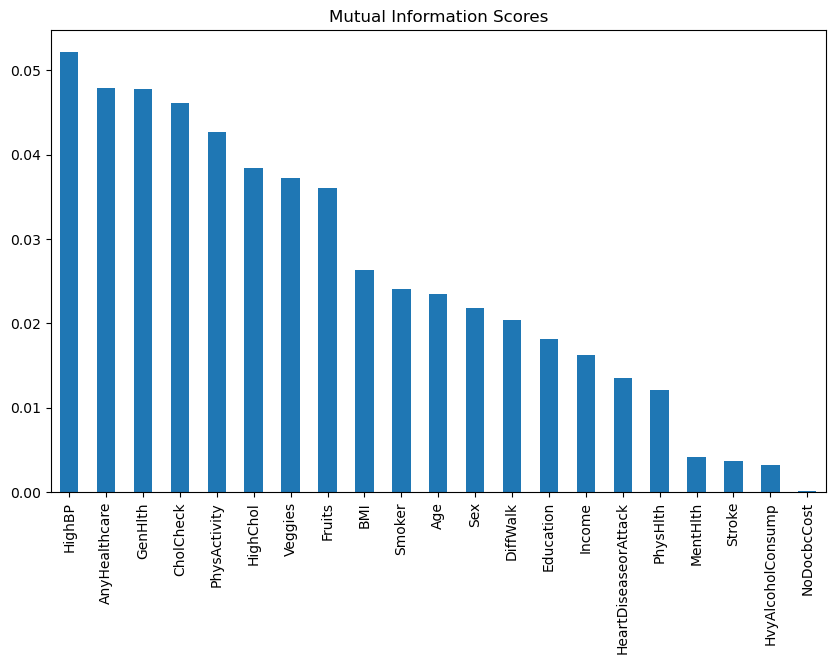

In [120]:
from sklearn.feature_selection import mutual_info_classif

mi = mutual_info_classif(X, y)
mi_series = pd.Series(mi, index=X.columns).sort_values(ascending=False)
mi_series.plot(kind='bar', figsize=(10,6), title='Mutual Information Scores')
plt.show()

In [121]:

rfe_ranks = pd.Series(
    data=[len(selected_features) - i for i in range(len(selected_features))],
    index=selected_features,
    name='RFERank'
)

lasso_rank = feature_importance.abs().rank(ascending=False).rename('LassoRank')
mi_rank = mi_series.rank(ascending=False).rename('MIRank')

feature_rank_df = pd.concat([lasso_rank, mi_rank, rfe_ranks], axis=1)

feature_rank_df['RFERank'] = feature_rank_df['RFERank'].fillna(len(feature_rank_df) + 1)

feature_rank_df['AverageRank'] = feature_rank_df[['LassoRank', 'MIRank', 'RFERank']].mean(axis=1)

combined_rank = feature_rank_df.sort_values(by='AverageRank')

print("\nCombined Feature Rankings:")
print(combined_rank.round(2))



Combined Feature Rankings:
                      LassoRank  MIRank  RFERank  AverageRank
GenHlth                     1.0     3.0      4.0         2.67
HighBP                      3.0     1.0     10.0         4.67
BMI                         2.0     9.0      7.0         6.00
Age                         5.0    11.0      2.0         6.00
HighChol                    4.0     6.0      9.0         6.33
CholCheck                  11.0     4.0      8.0         7.67
Income                      8.0    15.0      1.0         8.00
Sex                        10.0    12.0      3.0         8.33
HeartDiseaseorAttack        6.0    16.0      6.0         9.33
HvyAlcoholConsump           9.0    20.0      5.0        11.33
AnyHealthcare              14.0     2.0     22.0        12.67
DiffWalk                    7.0    13.0     22.0        14.00
PhysActivity               17.0     5.0     22.0        14.67
Smoker                     15.0    10.0     22.0        15.67
Veggies                    20.0     7.0   

In [122]:
#menually drop low imapacted feature
#top_features = combined_rank.head(10).index.tolist()
top_features = combined_rank.sort_values('AverageRank').head(10).index.tolist()
X_selected = X[top_features]
X_selected

,GenHlth,HighBP,BMI,Age,HighChol,CholCheck,Income,Sex,HeartDiseaseorAttack,HvyAlcoholConsump
0,5.0,1.0,40.0,9.0,1.0,1.0,3.0,0.0,0.0,0.0
1,3.0,0.0,25.0,7.0,0.0,0.0,1.0,0.0,0.0,0.0
2,5.0,1.0,28.0,9.0,1.0,1.0,8.0,0.0,0.0,0.0
3,2.0,1.0,27.0,11.0,0.0,1.0,6.0,0.0,0.0,0.0
4,2.0,1.0,24.0,11.0,1.0,1.0,4.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
253675,3.0,1.0,45.0,5.0,1.0,1.0,7.0,1.0,0.0,0.0
253676,4.0,1.0,18.0,11.0,1.0,1.0,4.0,0.0,0.0,0.0
253677,1.0,0.0,28.0,2.0,0.0,1.0,2.0,0.0,0.0,0.0
253678,3.0,1.0,23.0,7.0,0.0,1.0,1.0,1.0,0.0,0.0


In [124]:
#before going to next step check it
print("Original class distribution:")
print(y.value_counts())

Original class distribution:
Diabetes_binary
0.0    194377
1.0     35097
Name: count, dtype: int64


In [125]:
#start step3 from here
#SMOTE + Tomek Links
from imblearn.combine import SMOTETomek
smote_tomek = SMOTETomek(random_state=42)
X_bal, y_bal = smote_tomek.fit_resample(X_selected, y)

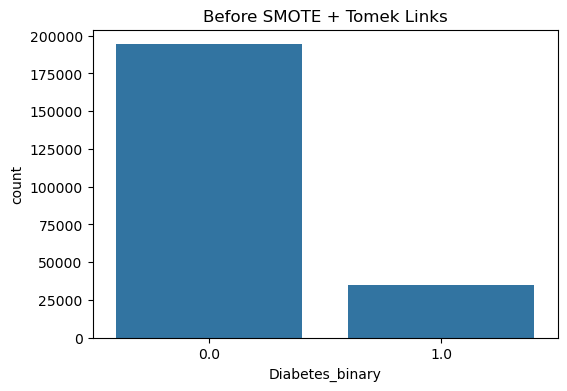

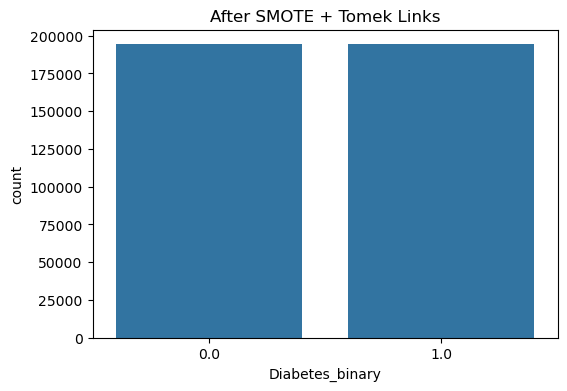

In [127]:
# Before SMOTE + Tomek Links
import seaborn as sns
plt.figure(figsize=(6,4))
sns.countplot(x=y)
plt.title("Before SMOTE + Tomek Links")
plt.show()

# After SMOTE + Tomek Links
plt.figure(figsize=(6,4))
sns.countplot(x=y_bal)
plt.title("After SMOTE + Tomek Links")
plt.show()

In [129]:
# Use SMOTE + Tomek Links balanced data
X_final = X_bal
y_final = y_bal

In [130]:
#train test, for testing it will be 20%
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_final, y_final,
    test_size=0.2,
    random_state=42,
    stratify=y_final
)

In [131]:
print("Train set count:\n", y_train.value_counts())
print("\nTest set count:\n", y_test.value_counts())

Train set count:
 Diabetes_binary
1.0    155469
0.0    155468
Name: count, dtype: int64

Test set count:
 Diabetes_binary
0.0    38868
1.0    38867
Name: count, dtype: int64


In [175]:
from sklearn.ensemble import RandomForestClassifier
final_best_rf = RandomForestClassifier(
    bootstrap=False,
    max_depth=25,
    max_features='log2',
    min_samples_leaf=1,
    min_samples_split=15,
    n_estimators=700,
    random_state=42,
    n_jobs=-1
)

final_best_rf.fit(X_train, y_train)


RandomForestClassifier(bootstrap=False, max_depth=25, max_features='log2',
                       min_samples_split=15, n_estimators=700, n_jobs=-1,
                       random_state=42)

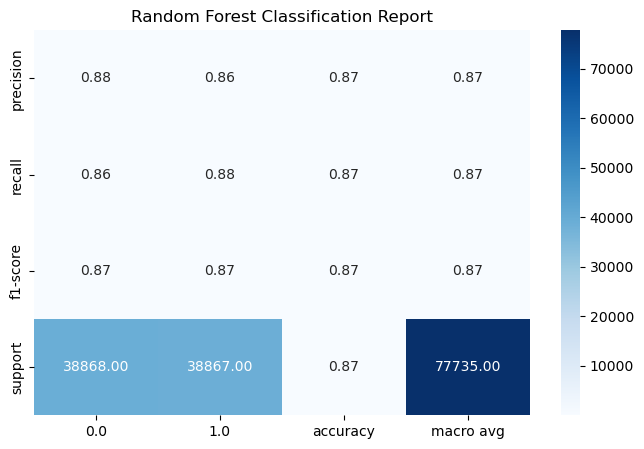

In [176]:
y_pred_final_rf = final_best_rf.predict(X_test)
report_dict_final_rf = classification_report(y_test, y_pred_final_rf, output_dict=True)
report_df_final_rf = pd.DataFrame(report_dict_final_rf).transpose()

plt.figure(figsize=(8, 5))
sns.heatmap(report_df_final_rf.iloc[:-1, :].T, annot=True, cmap='Blues', fmt=".2f")
plt.title("Random Forest Classification Report")
plt.show()


In [220]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
y_pred_rf = final_best_rf.predict(X_test)
y_proba_rf = final_best_rf.predict_proba(X_test)[:, 1]

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))

from sklearn.metrics import roc_auc_score
print("\nROC-AUC:", roc_auc_score(y_test, y_pred_rf))


Accuracy: 0.8644368688492957

Classification Report:
               precision    recall  f1-score   support

         0.0       0.88      0.86      0.87     38868
         1.0       0.86      0.88      0.87     38867

    accuracy                           0.87     77735
   macro avg       0.87      0.87      0.87     77735
weighted avg       0.87      0.87      0.87     77735


Confusion Matrix:
 [[33304  5564]
 [ 4559 34308]]

ROC-AUC: 0.8697756856868081


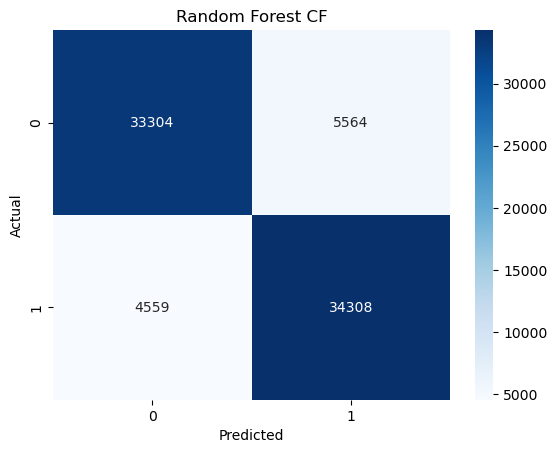

In [222]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Random Forest CF")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()



In [224]:
from xgboost import XGBClassifier

best_params = {
    'colsample_bytree': 1.0,
    'learning_rate': 0.1,
    'max_depth': 9,
    'n_estimators': 550,
    'subsample': 0.55,
    'random_state': 42,
    'n_jobs': -1,
    'tree_method':'hist',
    'use_label_encoder': False, 
    'eval_metric': 'logloss'   
}


final_xgb = XGBClassifier(**best_params)
final_xgb.fit(X_train, y_train)


y_pred_xgb = final_xgb.predict(X_test)
y_proba_xgb = final_xgb.predict_proba(X_test)[:, 1]

print("ROC-AUC:", roc_auc_score(y_test, y_proba_xgb))
print(classification_report(y_test, y_pred_xgb))


E:\Anaconda\Lib\site-packages\xgboost\training.py:183: UserWarning: [19:34:36] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


ROC-AUC: 0.943762793074841
              precision    recall  f1-score   support

         0.0       0.85      0.89      0.87     38868
         1.0       0.88      0.84      0.86     38867

    accuracy                           0.86     77735
   macro avg       0.87      0.86      0.86     77735
weighted avg       0.87      0.86      0.86     77735



In [226]:
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))

Accuracy: 0.8644368688492957


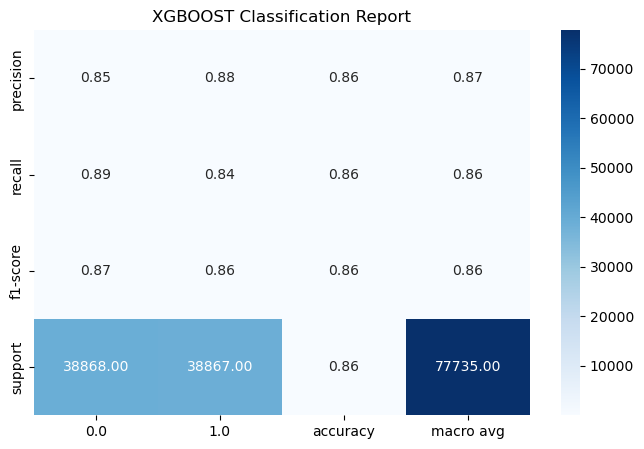

In [228]:
report_dict_final_xgb = classification_report(y_test, y_pred_xgb, output_dict=True)

report_df_final_xgb = pd.DataFrame(report_dict_final_xgb).transpose()

plt.figure(figsize=(8, 5))
sns.heatmap(report_df_final_xgb.iloc[:-1, :].T, annot=True, cmap='Blues', fmt=".2f")
plt.title("XGBOOST Classification Report")
plt.show()


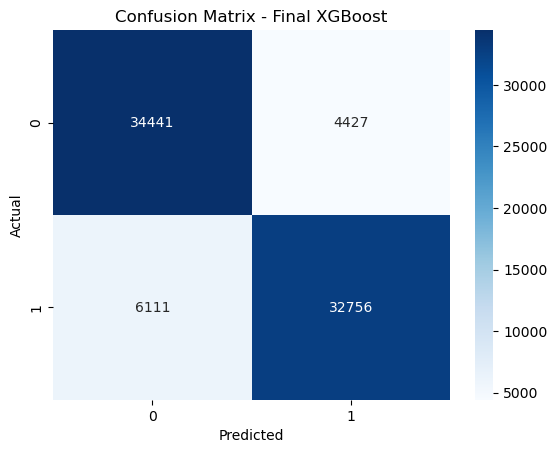

In [230]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_xgb)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Final XGBoost")
plt.show()

In [234]:
from sklearn.ensemble import VotingClassifier

ensemble_model = VotingClassifier(
    estimators=[
        ('rf', final_best_rf),
        ('xgb', final_xgb)  
    ],
    voting='soft',  # average probabilities
    n_jobs=-1
)

ensemble_model.fit(X_train, y_train)
y_pred_ens = ensemble_model.predict(X_test)


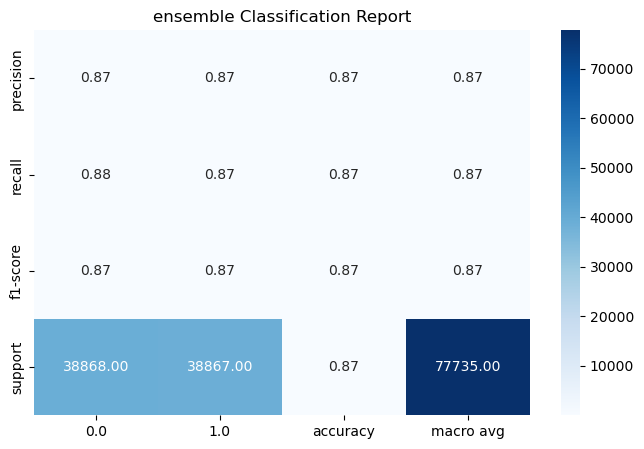

In [240]:
report_dict_final_ensemble = classification_report(y_test, y_pred_ens, output_dict=True)

report_df_final_ensemble = pd.DataFrame(report_dict_final_ensemble).transpose()

plt.figure(figsize=(8, 5))
sns.heatmap(report_df_final_ensemble.iloc[:-1, :].T, annot=True, cmap='Blues', fmt=".2f")
plt.title("ensemble Classification Report")
plt.show()


In [242]:
y_proba_ens = ensemble_model.predict_proba(X_test)[:, 1]

print("ROC-AUC:", roc_auc_score(y_test, y_proba_ens))
print(classification_report(y_test, y_pred_ens))


ROC-AUC: 0.950009504180705
              precision    recall  f1-score   support

         0.0       0.87      0.88      0.87     38868
         1.0       0.87      0.87      0.87     38867

    accuracy                           0.87     77735
   macro avg       0.87      0.87      0.87     77735
weighted avg       0.87      0.87      0.87     77735



In [244]:
print("Accuracy:", accuracy_score(y_test, y_pred_ens))

Accuracy: 0.8737505628095452


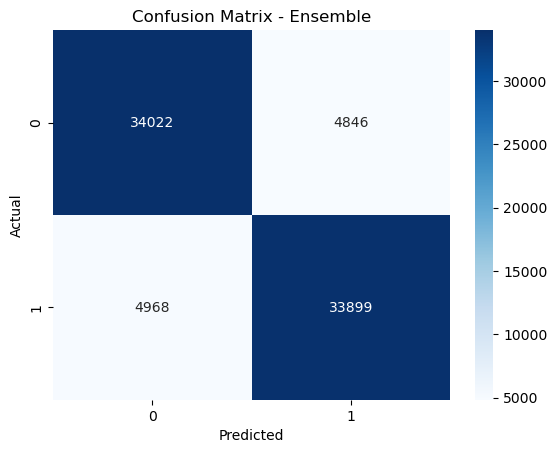

In [246]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Ensemble")
plt.show()

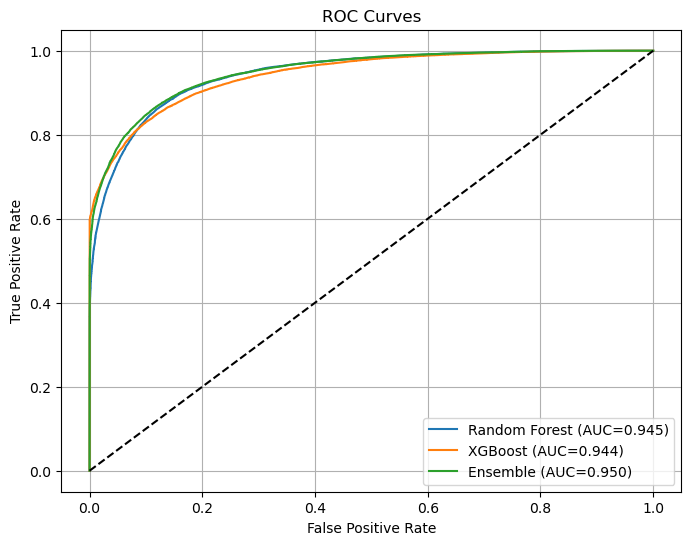

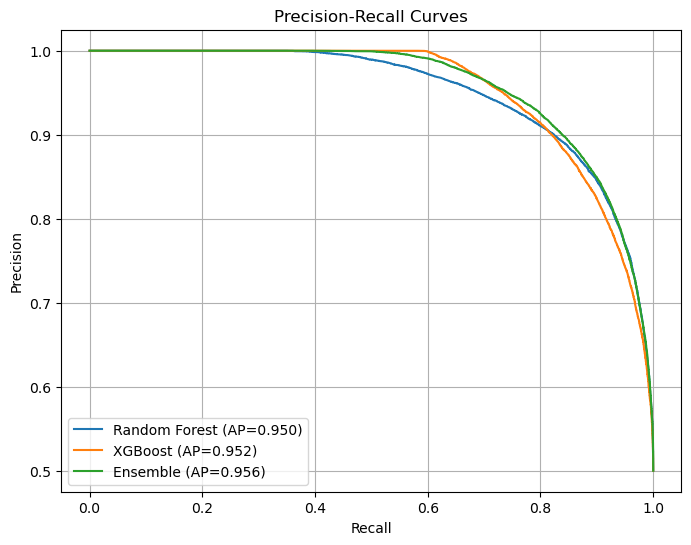

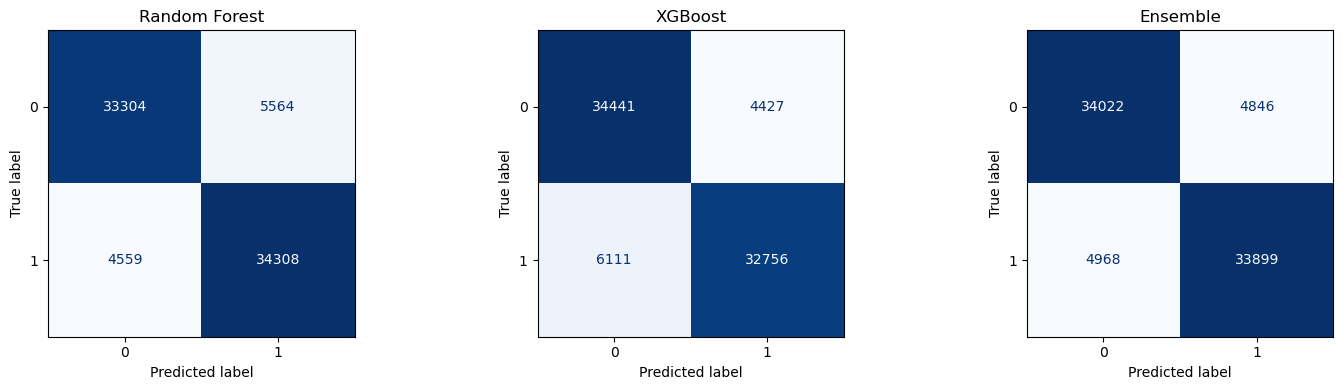

In [283]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, precision_recall_curve, confusion_matrix, ConfusionMatrixDisplay, roc_auc_score, average_precision_score


#ROC Curves
plt.figure(figsize=(8,6))
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_proba_rf)
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_proba_xgb)
fpr_ens, tpr_ens, _ = roc_curve(y_test, y_proba_ens)

plt.plot(fpr_rf, tpr_rf, label=f"Random Forest (AUC={roc_auc_score(y_test, y_proba_rf):.3f})")
plt.plot(fpr_xgb, tpr_xgb, label=f"XGBoost (AUC={roc_auc_score(y_test, y_proba_xgb):.3f})")
plt.plot(fpr_ens, tpr_ens, label=f"Ensemble (AUC={roc_auc_score(y_test, y_proba_ens):.3f})")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves")
plt.legend()
plt.grid(True)
plt.savefig("combine_ROC_curves.png", dpi=300, bbox_inches='tight')
plt.show()

#Precision-Recall Curves
plt.figure(figsize=(8,6))
prec_rf, rec_rf, _ = precision_recall_curve(y_test, y_proba_rf)
prec_xgb, rec_xgb, _ = precision_recall_curve(y_test, y_proba_xgb)
prec_ens, rec_ens, _ = precision_recall_curve(y_test, y_proba_ens)

plt.plot(rec_rf, prec_rf, label=f"Random Forest (AP={average_precision_score(y_test, y_proba_rf):.3f})")
plt.plot(rec_xgb, prec_xgb, label=f"XGBoost (AP={average_precision_score(y_test, y_proba_xgb):.3f})")
plt.plot(rec_ens, prec_ens, label=f"Ensemble (AP={average_precision_score(y_test, y_proba_ens):.3f})")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curves")
plt.legend()
plt.grid(True)
plt.savefig("combine_precision-recall_curves.png", dpi=300, bbox_inches='tight')
plt.show()

#CM
fig, axes = plt.subplots(1, 3, figsize=(15,4))

models = [
    ("Random Forest", y_pred_rf),
    ("XGBoost", y_pred_xgb),
    ("Ensemble", y_pred_ens)
]

for ax, (name, preds) in zip(axes, models):
    cm = confusion_matrix(y_test, preds)
    disp = ConfusionMatrixDisplay(cm)
    disp.plot(ax=ax, values_format='d', cmap='Blues', colorbar=False)
    ax.set_title(name)

plt.tight_layout()
plt.savefig("combine_confussion_matrix.png", dpi=300, bbox_inches='tight')
plt.show()


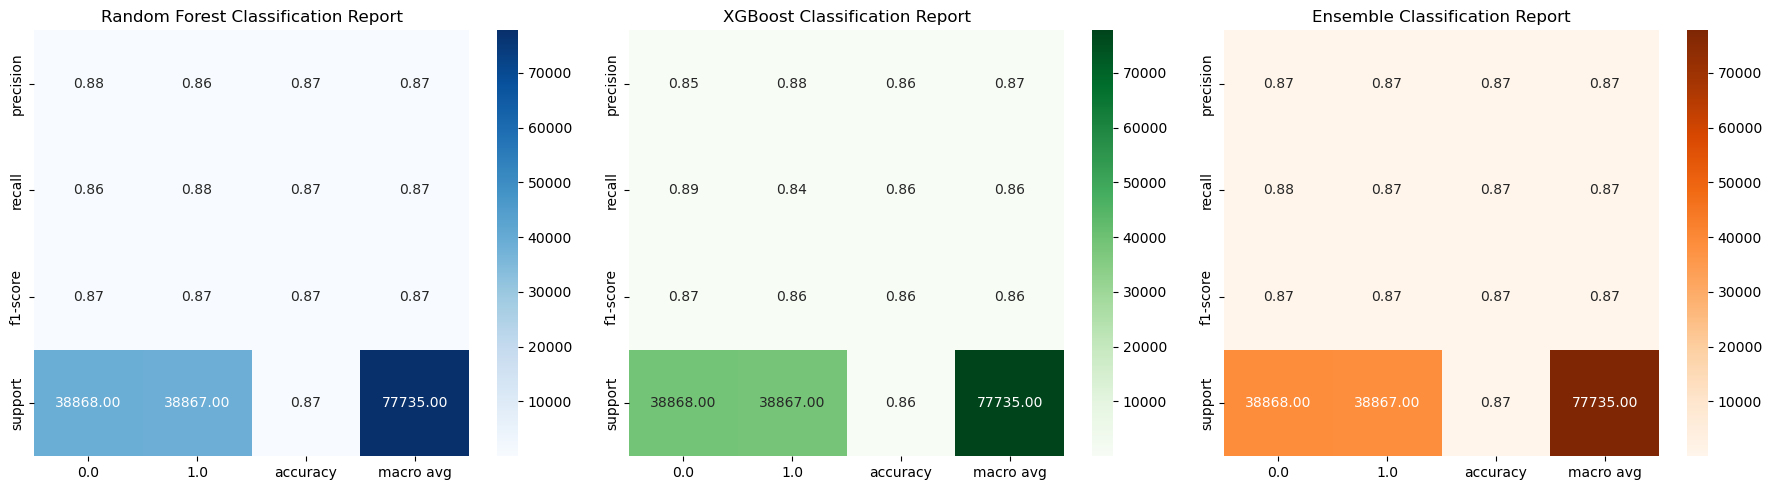

In [288]:
report_rf = pd.DataFrame(classification_report(y_test, y_pred_rf, output_dict=True)).transpose()
report_xgb = pd.DataFrame(classification_report(y_test, y_pred_xgb, output_dict=True)).transpose()
report_ens = pd.DataFrame(classification_report(y_test, y_pred_ens, output_dict=True)).transpose()

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.heatmap(report_rf.iloc[:-1, :].T, annot=True, cmap='Blues', fmt=".2f", ax=axes[0])
axes[0].set_title("Random Forest Classification Report")


sns.heatmap(report_xgb.iloc[:-1, :].T, annot=True, cmap='Greens', fmt=".2f", ax=axes[1])
axes[1].set_title("XGBoost Classification Report")


sns.heatmap(report_ens.iloc[:-1, :].T, annot=True, cmap='Oranges', fmt=".2f", ax=axes[2])
axes[2].set_title("Ensemble Classification Report")

plt.tight_layout()
plt.savefig("combine_classification_reports.png", dpi=300, bbox_inches='tight')
plt.show()


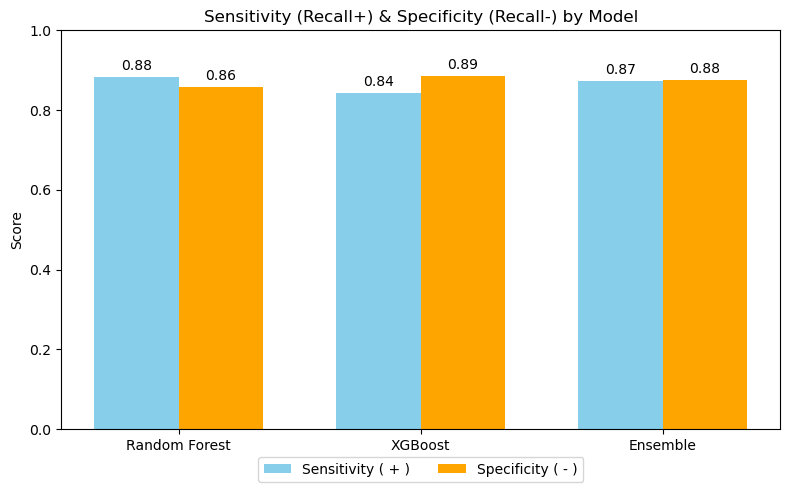

In [291]:
x = np.arange(len(sens_spec_df["Model"]))
width = 0.35

fig, ax = plt.subplots(figsize=(8, 5))
bars1 = ax.bar(x - width/2, sens_spec_df["Sensitivity (Recall+)"], width, label='Sensitivity ( + )', color='skyblue')
bars2 = ax.bar(x + width/2, sens_spec_df["Specificity (Recall-)"], width, label='Specificity ( - )', color='orange')

ax.set_ylabel('Score')
ax.set_title('Sensitivity (Recall+) & Specificity (Recall-) by Model')
ax.set_xticks(x)
ax.set_xticklabels(sens_spec_df["Model"])
ax.set_ylim(0, 1)
#ax.legend()
ax.legend(loc='lower center', bbox_to_anchor=(0.5, -0.15), ncol=2)


for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

plt.tight_layout()
plt.savefig("combine_positive_negative_recall.png", dpi=300, bbox_inches='tight')
plt.show()


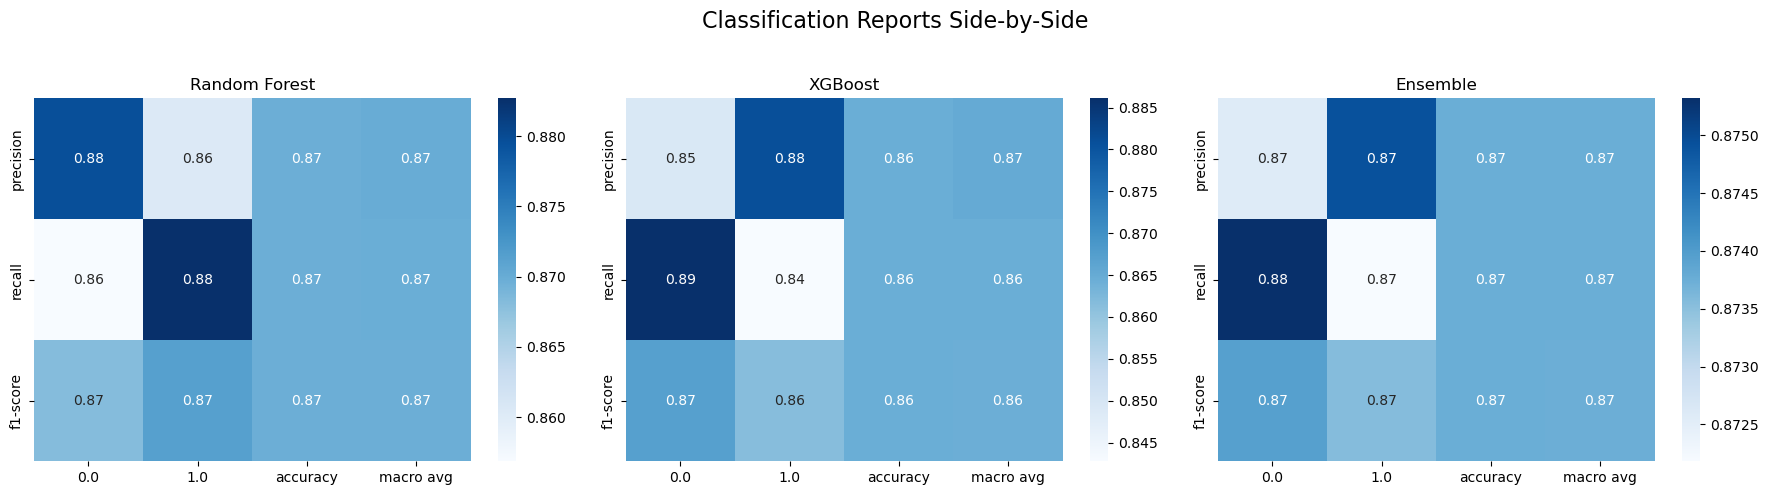

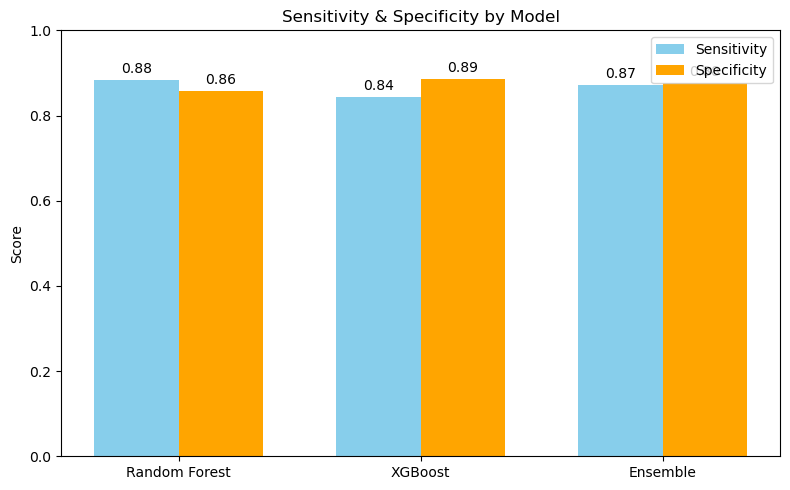

In [293]:
def get_report_df(y_true, y_pred):
    report_dict = classification_report(y_true, y_pred, output_dict=True)
    return pd.DataFrame(report_dict).transpose()

report_rf = get_report_df(y_test, y_pred_rf)
report_xgb = get_report_df(y_test, y_pred_xgb)
report_ens = get_report_df(y_test, y_pred_ens)

fig, axes = plt.subplots(1, 3, figsize=(18, 5))
sns.heatmap(report_rf.iloc[:-1, :-1].T, annot=True, cmap='Blues', fmt=".2f", ax=axes[0])
axes[0].set_title("Random Forest")
sns.heatmap(report_xgb.iloc[:-1, :-1].T, annot=True, cmap='Blues', fmt=".2f", ax=axes[1])
axes[1].set_title("XGBoost")
sns.heatmap(report_ens.iloc[:-1, :-1].T, annot=True, cmap='Blues', fmt=".2f", ax=axes[2])
axes[2].set_title("Ensemble")
plt.suptitle("Classification Reports Side-by-Side", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


def get_sensitivity_specificity(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    tn, fp, fn, tp = cm.ravel()
    sensitivity = tp / (tp + fn)  
    specificity = tn / (tn + fp)  
    return sensitivity, specificity

sens_rf, spec_rf = get_sensitivity_specificity(y_test, y_pred_rf)
sens_xgb, spec_xgb = get_sensitivity_specificity(y_test, y_pred_xgb)
sens_ens, spec_ens = get_sensitivity_specificity(y_test, y_pred_ens)

sens_spec_df = pd.DataFrame({
    "Model": ["Random Forest", "XGBoost", "Ensemble"],
    "Sensitivity (Recall+)": [sens_rf, sens_xgb, sens_ens],
    "Specificity (Recall-)": [spec_rf, spec_xgb, spec_ens]
})




x = np.arange(len(sens_spec_df["Model"]))
width = 0.35

fig, ax = plt.subplots(figsize=(8, 5))
bars1 = ax.bar(x - width/2, sens_spec_df["Sensitivity (Recall+)"], width, label='Sensitivity', color='skyblue')
bars2 = ax.bar(x + width/2, sens_spec_df["Specificity (Recall-)"], width, label='Specificity', color='orange')

ax.set_ylabel('Score')
ax.set_title('Sensitivity & Specificity by Model')
ax.set_xticks(x)
ax.set_xticklabels(sens_spec_df["Model"])
ax.set_ylim(0, 1)
ax.legend()

for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

plt.tight_layout()
plt.show()


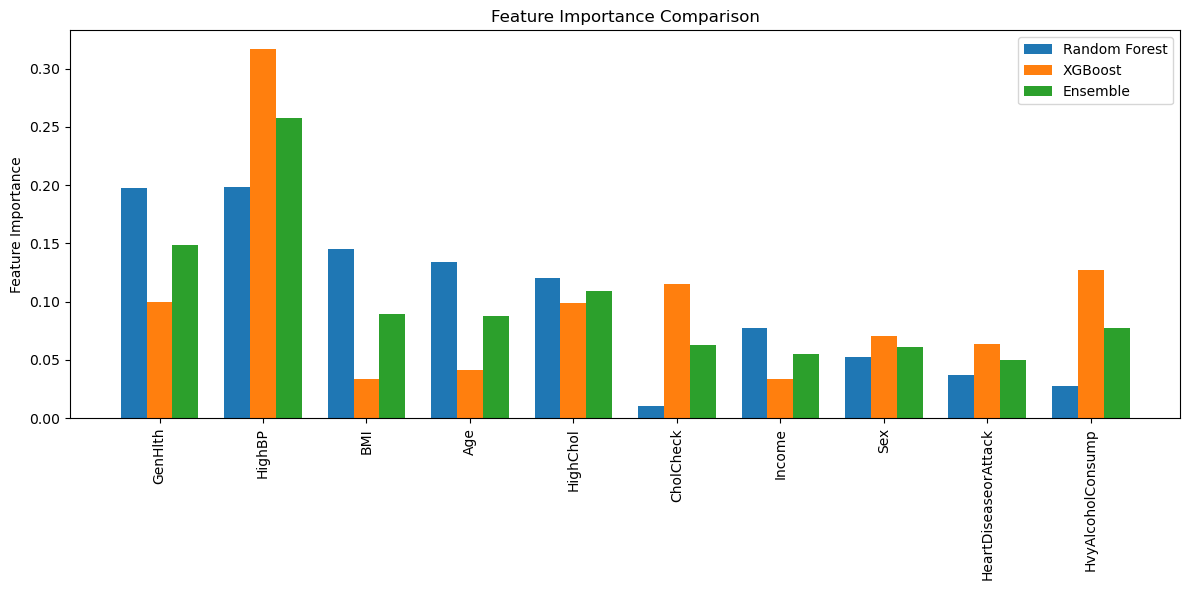

In [323]:
rf_importances = final_best_rf.feature_importances_
xgb_importances = final_xgb.feature_importances_
ens_importances = (rf_importances + xgb_importances) / 2 

features = X_train.columns
x = np.arange(len(features))

plt.figure(figsize=(12, 6))
plt.bar(x - 0.25, rf_importances, width=0.25, label='Random Forest')
plt.bar(x, xgb_importances, width=0.25, label='XGBoost')
plt.bar(x + 0.25, ens_importances, width=0.25, label='Ensemble')
plt.xticks(x, features, rotation=90)
plt.ylabel("Feature Importance")
plt.title("Feature Importance Comparison")
plt.legend()
plt.tight_layout()
plt.savefig("combine_feature_importance_comparison.png", dpi=300, bbox_inches='tight')
plt.show()


In [303]:
!pip install matplotlib-venn

  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Created wheel for matplotlib-venn: filename=matplotlib_venn-1.1.2-py3-none-any.whl size=45437 sha256=005800c35005967ec381983e14afd486675ad226e29a1f3f434a1cd6543fecbe
  Stored in directory: c:\users\mdnaj\appdata\local\pip\cache\wheels\c2\47\0c\f014c55a1cfd56dce41a1cafd23e3c590652b5e71330cc181c
Successfully built matplotlib-venn


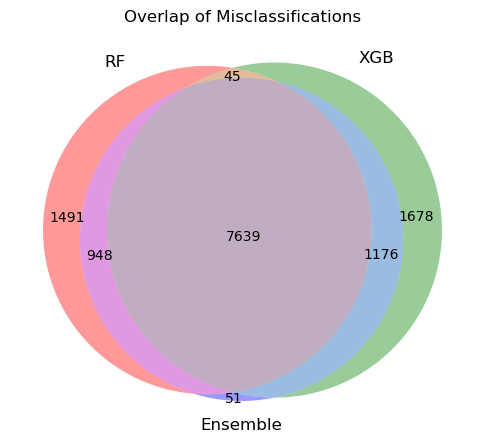

In [325]:
from matplotlib_venn import venn3

rf_errors = set(np.where(y_pred_rf != y_test)[0])
xgb_errors = set(np.where(y_pred_xgb != y_test)[0])
ens_errors = set(np.where(y_pred_ens != y_test)[0])

plt.figure(figsize=(6, 6))
venn3([rf_errors, xgb_errors, ens_errors], ('RF', 'XGB', 'Ensemble'))
plt.title("Overlap of Misclassifications")
plt.savefig("combine_missclassification.png", dpi=300, bbox_inches='tight')
plt.show()


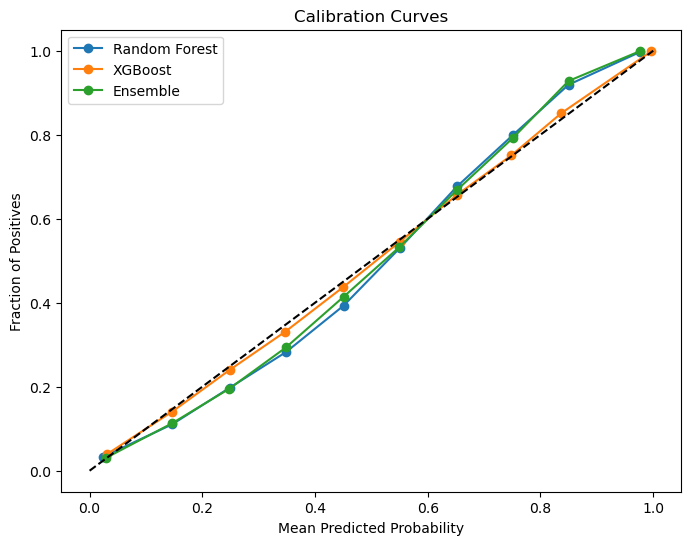

In [327]:
from sklearn.calibration import calibration_curve

plt.figure(figsize=(8, 6))

for model, name in zip([final_best_rf, final_xgb, ensemble_model],
                       ['Random Forest', 'XGBoost', 'Ensemble']):
    prob_pos = model.predict_proba(X_test)[:, 1]
    frac_pos, mean_pred = calibration_curve(y_test, prob_pos, n_bins=10)
    plt.plot(mean_pred, frac_pos, marker='o', label=name)

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('Mean Predicted Probability')
plt.ylabel('Fraction of Positives')
plt.title('Calibration Curves')
plt.legend()
plt.savefig("combine_calibration_curve.png", dpi=300, bbox_inches='tight')
plt.show()


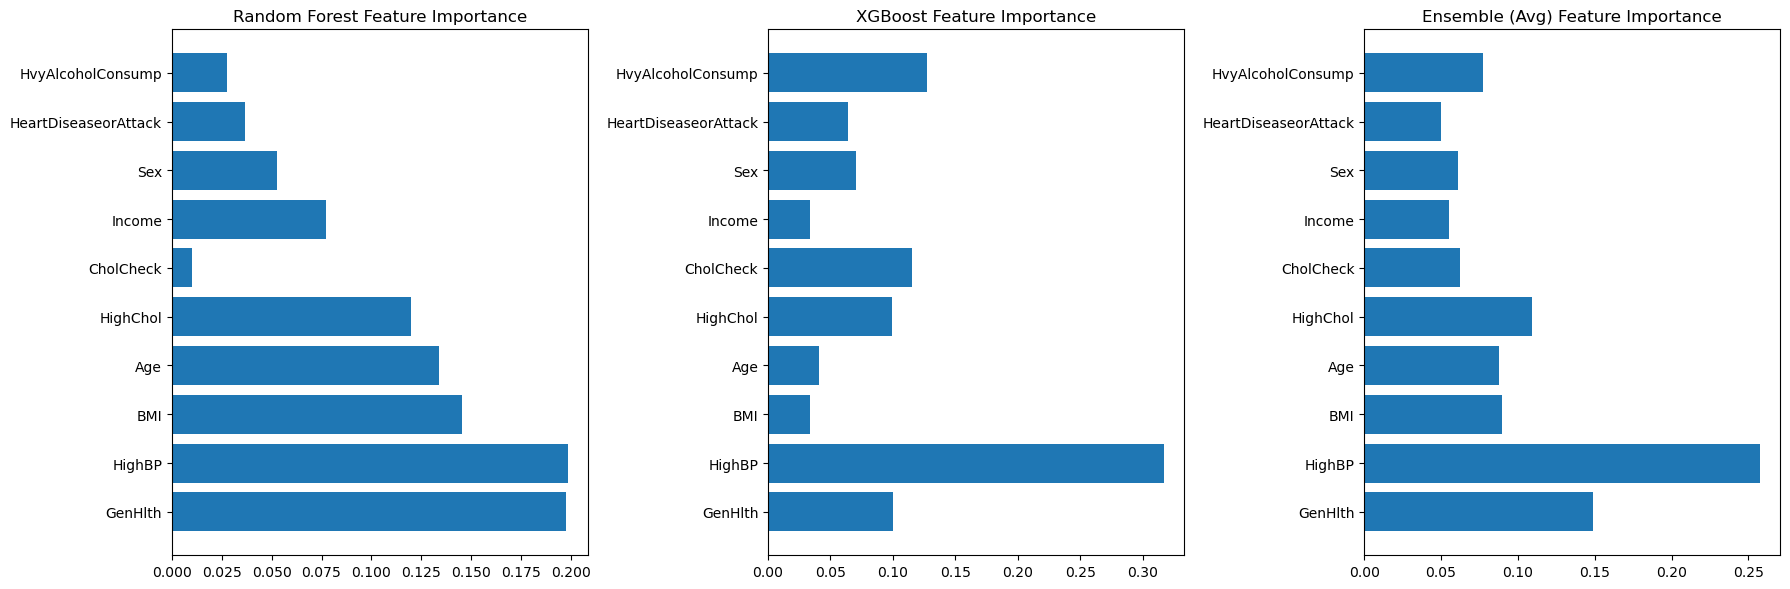

In [329]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

#Random Forest
importances_rf = final_best_rf.feature_importances_
axes[0].barh(X_test.columns, importances_rf)
axes[0].set_title("Random Forest Feature Importance")

#XGBoost
importances_xgb = final_xgb.feature_importances_
axes[1].barh(X_test.columns, importances_xgb)
axes[1].set_title("XGBoost Feature Importance")

#Ensemble (average of both)
avg_importances = (importances_rf + importances_xgb) / 2
axes[2].barh(X_test.columns, avg_importances)
axes[2].set_title("Ensemble (Avg) Feature Importance")

plt.tight_layout()
plt.savefig("combine_three_model_feature_importance.png", dpi=300, bbox_inches='tight')
plt.show()


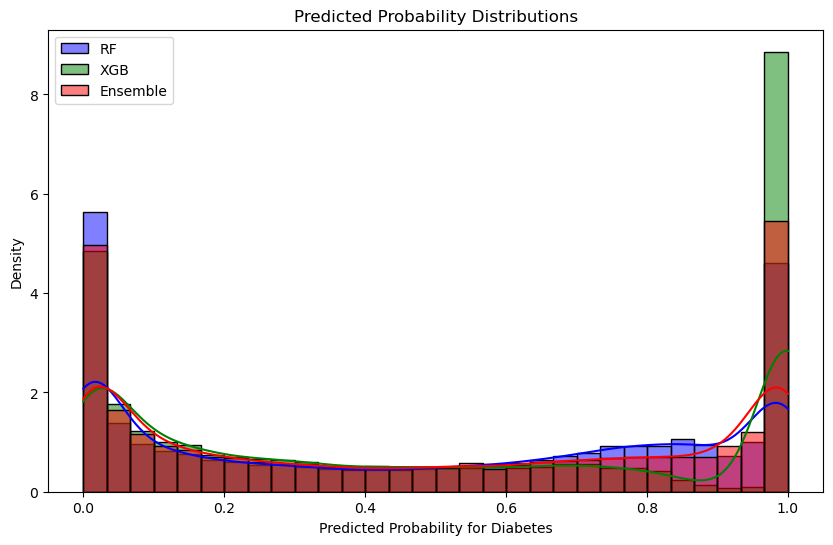

In [335]:
plt.figure(figsize=(10, 6))
sns.histplot(final_best_rf.predict_proba(X_test)[:,1], color='blue', label='RF', kde=True, stat="density", bins=30)
sns.histplot(final_xgb.predict_proba(X_test)[:,1], color='green', label='XGB', kde=True, stat="density", bins=30)
sns.histplot(ensemble_model.predict_proba(X_test)[:,1], color='red', label='Ensemble', kde=True, stat="density", bins=30)
plt.xlabel("Predicted Probability for Diabetes")
plt.ylabel("Density")
plt.title("Predicted Probability Distributions")
plt.legend()
plt.show()


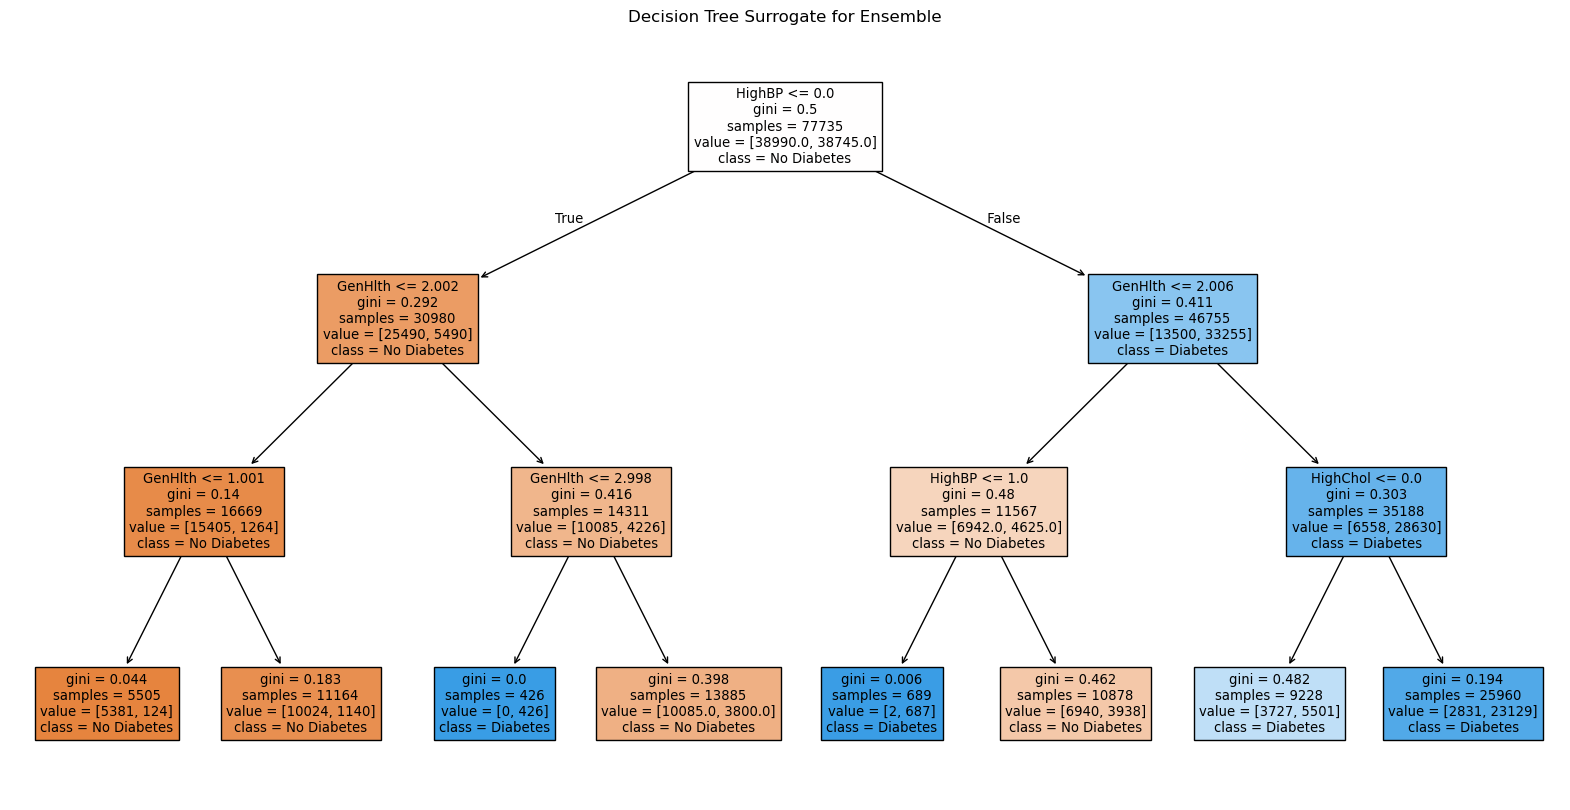

In [337]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

surrogate = DecisionTreeClassifier(max_depth=3)
surrogate.fit(X_test, ensemble_model.predict(X_test))

plt.figure(figsize=(20, 10))
plot_tree(surrogate, feature_names=X_test.columns, class_names=["No Diabetes","Diabetes"], filled=True)
plt.title("Decision Tree Surrogate for Ensemble")
plt.show()


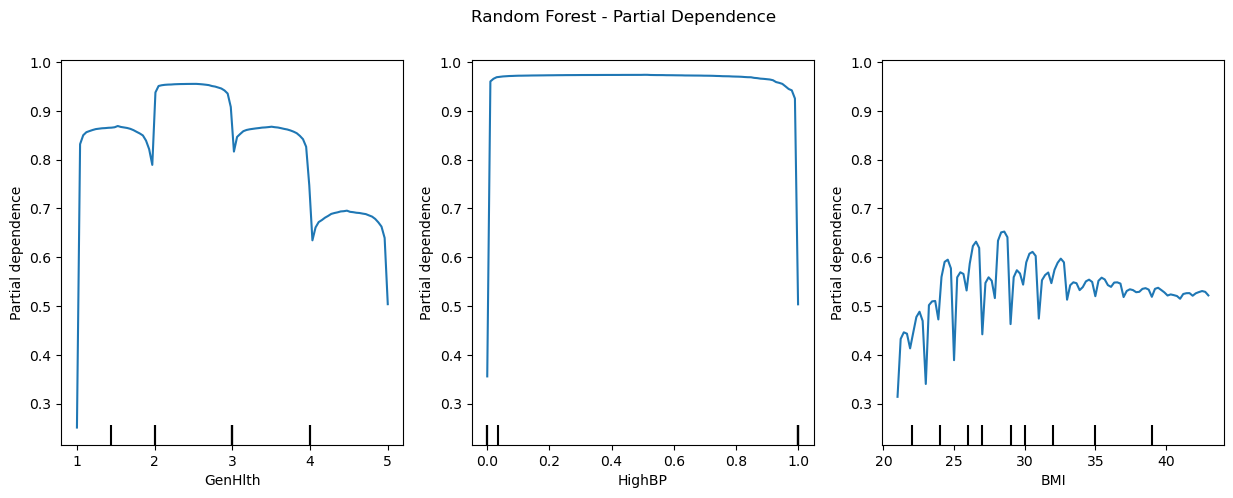

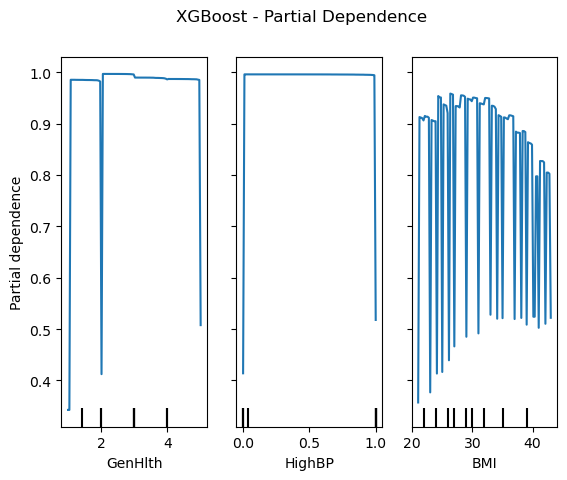

In [341]:
from sklearn.inspection import PartialDependenceDisplay

features_to_plot = [0, 1, 2]  
fig, ax = plt.subplots(1, len(features_to_plot), figsize=(15, 5))
PartialDependenceDisplay.from_estimator(final_best_rf, X_test, features_to_plot, ax=ax)
plt.suptitle("Random Forest - Partial Dependence")
plt.show()

PartialDependenceDisplay.from_estimator(final_xgb, X_test, features_to_plot)
plt.suptitle("XGBoost - Partial Dependence")
plt.show()


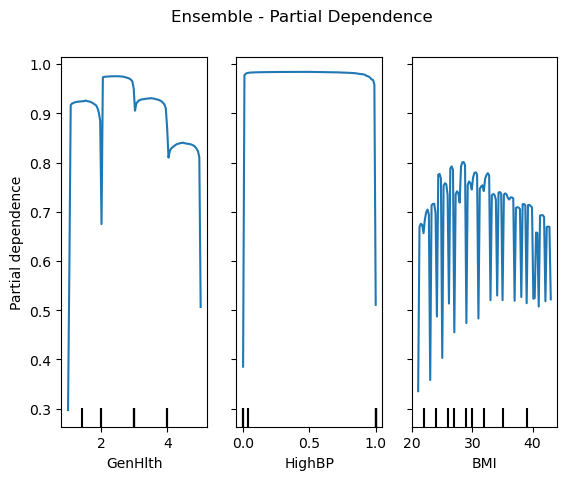

In [343]:
PartialDependenceDisplay.from_estimator(ensemble_model, X_test, features_to_plot)
plt.suptitle("Ensemble - Partial Dependence")
plt.show()

In [ ]:
import shap

# Random Forest SHAP
explainer_rf = shap.TreeExplainer(final_best_rf)
shap_values_rf = explainer_rf.shap_values(X_test)

shap.summary_plot(shap_values_rf[1], X_test, plot_type="bar")  # global importance



In [ ]:
shap.summary_plot(shap_values_rf[1], X_test)  # summary scatter

# XGBoost SHAP
explainer_xgb = shap.TreeExplainer(best_xgb)
shap_values_xgb = explainer_xgb.shap_values(X_test)

shap.summary_plot(shap_values_xgb, X_test) 

In [57]:
from sklearn.naive_bayes import GaussianNB,BernoulliNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report



# Base model
nb = BernoulliNB()
nb.fit(X_train, y_train)

# Predictions
y_pred = nb.predict(X_test)

# Evaluation
print("Base Model Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Base Model Accuracy: 0.7178876953753136
              precision    recall  f1-score   support

         0.0       0.70      0.76      0.73     38868
         1.0       0.74      0.68      0.71     38867

    accuracy                           0.72     77735
   macro avg       0.72      0.72      0.72     77735
weighted avg       0.72      0.72      0.72     77735



In [71]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import roc_auc_score, make_scorer
import numpy as np

# Define parameter space for BernoulliNB
param_dist = {
    'alpha': np.logspace(-3, 1, 50),     # Laplace smoothing
    'binarize': np.linspace(0.0, 1.0, 50), # Threshold for binarization
    'fit_prior': [True, False]           # Whether to learn class prior
}

# BernoulliNB model
nb = BernoulliNB()

# AUC scorer (for binary classification)
auc_scorer = make_scorer(roc_auc_score, needs_proba=True)

# RandomizedSearchCV
random_search = RandomizedSearchCV(
    nb,
    param_distributions=param_dist,
    n_iter=20,            # Number of random combinations to try
    scoring=auc_scorer,   # Use AUC score
    cv=3,                 # 3-fold cross-validation
    verbose=2,
    random_state=42,
    n_jobs=-1             # Use all CPU cores
)

# Fit on training data
random_search.fit(X_train, y_train)

# Best params & score
print("Best Params (RandomizedSearchCV):", random_search.best_params_)
print("Best AUC Score (CV):", random_search.best_score_)

# Evaluate on test set
best_nb = random_search.best_estimator_
y_pred_proba = best_nb.predict_proba(X_test)[:, 1]
y_pred = best_nb.predict(X_test)

test_auc = roc_auc_score(y_test, y_pred_proba)
print("Test AUC Score:", test_auc)


E:\Anaconda\Lib\site-packages\sklearn\metrics\_scorer.py:610: FutureWarning: The `needs_threshold` and `needs_proba` parameter are deprecated in version 1.4 and will be removed in 1.6. You can either let `response_method` be `None` or set it to `predict` to preserve the same behaviour.
  warnings.warn(


Fitting 3 folds for each of 20 candidates, totalling 60 fits
Best Params (RandomizedSearchCV): {'fit_prior': True, 'binarize': 0.04081632653061224, 'alpha': 0.2329951810515372}
Best AUC Score (CV): 0.7764192136938529
Test AUC Score: 0.7807039581649872


In [73]:
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

         0.0       0.70      0.76      0.73     38868
         1.0       0.74      0.67      0.70     38867

    accuracy                           0.72     77735
   macro avg       0.72      0.72      0.72     77735
weighted avg       0.72      0.72      0.72     77735



In [75]:
from sklearn.model_selection import GridSearchCV

# Get best params from RandomizedSearchCV
best_params = random_search.best_params_

# Narrow the search range around the best parameters
param_grid = {
    'alpha': np.linspace(
        max(1e-3, best_params['alpha'] * 0.5),
        best_params['alpha'] * 1.5,
        10
    ),
    'binarize': np.linspace(
        max(0.0, best_params['binarize'] - 0.1),
        min(1.0, best_params['binarize'] + 0.1),
        10
    ),
    'fit_prior': [best_params['fit_prior']]
}

# GridSearchCV
grid_search = GridSearchCV(
    BernoulliNB(),
    param_grid,
    scoring=auc_scorer,  # Still use AUC score
    cv=3,
    verbose=2,
    n_jobs=-1
)

# Fit grid search
grid_search.fit(X_train, y_train)

# Results
print("Best Params (GridSearchCV):", grid_search.best_params_)
print("Best AUC Score (CV):", grid_search.best_score_)

# Evaluate on test set
best_nb_grid = grid_search.best_estimator_
y_pred_proba_grid = best_nb_grid.predict_proba(X_test)[:, 1]
test_auc_grid = roc_auc_score(y_test, y_pred_proba_grid)
print("Test AUC Score (GridSearchCV):", test_auc_grid)


Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best Params (GridSearchCV): {'alpha': 0.1164975905257686, 'binarize': 0.0, 'fit_prior': True}
Best AUC Score (CV): 0.7790368572593923
Test AUC Score (GridSearchCV): 0.7830676777868346


In [77]:
y_pred_grid=best_nb_grid.predict(X_test)

In [79]:
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

         0.0       0.70      0.76      0.73     38868
         1.0       0.74      0.67      0.70     38867

    accuracy                           0.72     77735
   macro avg       0.72      0.72      0.72     77735
weighted avg       0.72      0.72      0.72     77735



In [81]:

print("Accuracy:", accuracy_score(y_test, y_pred_grid))

Accuracy: 0.7178876953753136


In [83]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, accuracy_score

# Base model
gb_base = GradientBoostingClassifier(random_state=42)
gb_base.fit(X_train, y_train)

# Predictions
y_pred = gb_base.predict(X_test)

# Evaluation
print("Base Model Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Base Model Accuracy: 0.8205184279925387

Classification Report:
               precision    recall  f1-score   support

         0.0       0.84      0.79      0.82     38868
         1.0       0.80      0.85      0.83     38867

    accuracy                           0.82     77735
   macro avg       0.82      0.82      0.82     77735
weighted avg       0.82      0.82      0.82     77735



In [87]:
from sklearn.tree import DecisionTreeClassifier
# Base Decision Tree
dt_clf = DecisionTreeClassifier(random_state=42)
dt_clf.fit(X_train, y_train)

# Predictions
y_pred = dt_clf.predict(X_test)

# Results
print("Base Decision Tree Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Base Decision Tree Accuracy: 0.7738969386643425
              precision    recall  f1-score   support

         0.0       0.87      0.86      0.87     38876
         1.0       0.29      0.32      0.30      7019

    accuracy                           0.77     45895
   macro avg       0.58      0.59      0.58     45895
weighted avg       0.78      0.77      0.78     45895

